# 本文件用于通过分析不同内衣的销量，明晰不同款式、颜色内衣的市场价值，从而确定商家的进货品类。

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
df_bra = pd.read_csv('bra.csv', header = 0)
df_colors = pd.read_csv('colors.csv', header = 0, index_col = 0)
df_bra.dropna(axis = 0, how = 'any', inplace = True)     #删除dataframe内空行
df_colors.dropna(axis = 0, how = 'any', inplace = True)

In [3]:
bra_data = np.array(df_bra).astype('str')     #将dataframe转化为array，且将元素类型转化为str
colors_data = np.array(df_colors).astype('str')
size = bra_data[:, 2]
data_else = []
n=[]
for i in range(size.shape[0]):
    if '/M' in size[i] or '/L' in size[i] or '/XL' in size[i]:
        data_else.append(bra_data[i, :])
        n.append(i)
bra_data = np.delete(bra_data, n, axis = 0)

In [4]:
time = bra_data[:, 0]

color = bra_data[:, 1]
color_name = []
size_name = []
size = bra_data[:, 2]

for i in range(color.shape[0]):
    color_name.append(colors_data[colors_data[:, 0] == color[i], 1][0])
                             
    st = re.search('[ABCDEabcde]', size[i])     #利用re模块将size数据分组
    size_name.append(st.group())

In [5]:
time_else = np.array(data_else)[:, 0]

color_else = np.array(data_else)[:, 1]
color_else_name = []
size_else_name = []
size = np.array(data_else)[:, 2]

for i in range(color_else.shape[0]):
    color_else_name.append(colors_data[colors_data[:, 0] == color_else[i], 1][0])
                             
    st = re.search('[MLX]', size[i])     #利用re模块将size数据分组
    size_else_name.append(st.group())

In [6]:
lst1 = ['A', 'B', 'C', 'D', 'E', 'a', 'b', 'c', 'd', 'e']
size_num = list(size_name.count(lst1[i]) + size_name.count(lst1[i + 5]) for i in range(5))
lst3 = ['粉色', '肤色', '黑色', '红色', '黄色', '灰色', '蓝色', '绿色', '紫色', '棕色']
color_num = list(color_name.count(i) for i in lst3)

lst2 = ['M', 'L', 'X']
size_else_num = list(size_else_name.count(i) for i in lst2)
color_else_num = list(color_else_name.count(i) for i in lst3)

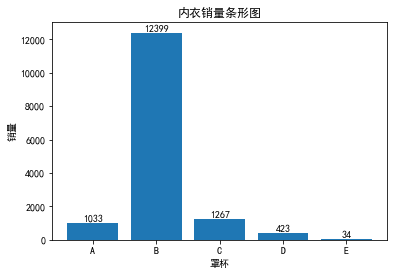

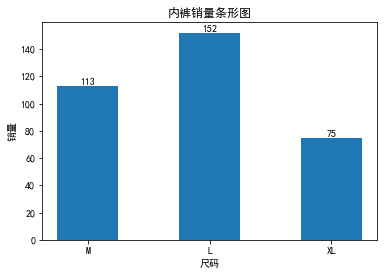

In [7]:
plt.rcParams['font.sans-serif'] = ['SimHei']     #使中文标签正常显示
plt.rcParams['axes.unicode_minus'] = False

cups=('A', 'B', 'C', 'D', 'E')
plt.bar(cups, size_num)
plt.xlabel('罩杯')
plt.ylabel('销量')
plt.title('内衣销量条形图')
for a, b in zip(np.arange(5), size_num):
    plt.text(a, b + 0.05, '%.0f' % b, ha = 'center', va = 'bottom', fontsize = 10)     # 添加数据标签
plt.show()

sizes = ('M', 'L', 'XL')
plt.bar(sizes, size_else_num, width = 0.5)
plt.xlabel('尺码')
plt.ylabel('销量')
plt.title('内裤销量条形图')
for a, b in zip(np.arange(3), size_else_num):
    plt.text(a, b + 0.05, '%.0f' % b, ha = 'center', va = 'bottom', fontsize = 10)
plt.show()

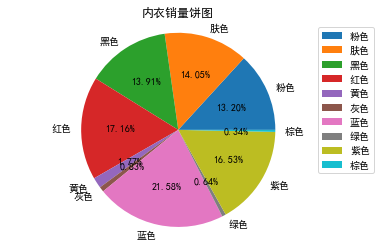

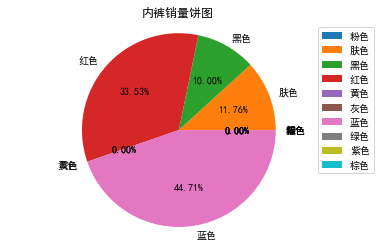

In [8]:
plt.pie(color_num, labels = lst3, autopct = '%1.2f%%') #画饼图
plt.title('内衣销量饼图')
plt.axis('equal')     #设置x，y轴刻度一致，这样饼图才能是圆的
plt.legend(bbox_to_anchor = (1.1, 1))
plt.show()

plt.pie(color_else_num, labels = lst3, autopct = '%1.2f%%')
plt.title('内裤销量饼图')
plt.axis('equal')
plt.legend(bbox_to_anchor = (1.1, 1))
plt.show()